## **Imports**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import norm, skew
%matplotlib inline

## **Data uploading from local drive**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# **2(c)**
## **Data Shape**

In [ ]:
print("Train:", train.shape)
print("Test:",test.shape)

Train: (1460, 81)
Test: (1459, 80)


# **2(c)**
## **Correlation** 
coefficient ranges from -1 to 1. When it is close to 1, it means that there is strong positive correalation. For example, SalePrice tends to go up when OverallQual goes up. When the coefficient is close to –1, it means that there is a strong negative correlation. For example, there is negative correaltion between EnclosedPorch and SalePrice, KitchenAbvGr and SalePrice. Coefficients close to 0 mean that there is no linear correlation.

In [ ]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr


Taking the target variable from the train dataframe:

In [ ]:
y_train = train[['Id', 'SalePrice']]
train.drop('SalePrice', axis = 1, inplace = True)

# **2(c)**
## **Attributes**

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## **Outliers**

From the plot, we can see that there are 2 outliers that have a very low "SalePrice" despite having a huge "GrLivArea". We can safely remove them as they're huge deviation from the trend are just noise in the data.

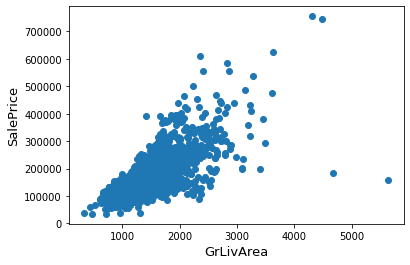

In [ ]:

fig = plt.figure()
plt.scatter(x = train['GrLivArea'], y = y_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

From the plot, we can see that there are 2 outliers that have a very low "SalePrice" despite having a huge "LotFrontage". We can safely remove them as they're huge deviation from the trend are just noise in the data.

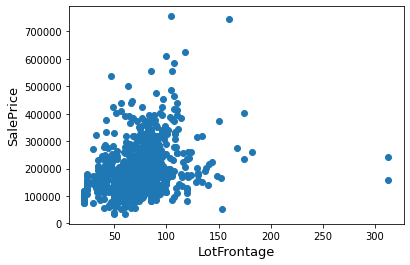

In [ ]:

fig = plt.figure()
plt.scatter(x = train['LotFrontage'], y = y_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotFrontage', fontsize=13)
plt.show()

In [ ]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The target variable is right skewed.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180921.20 and sigma = 79415.29



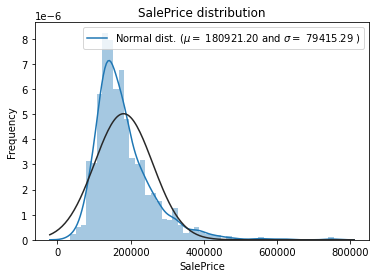

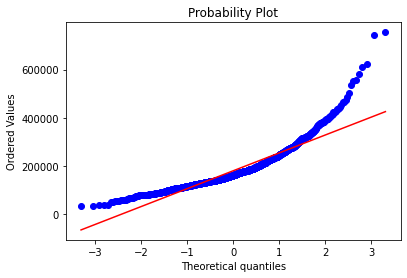

In [ ]:
sns.distplot(y_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(y_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(y_train['SalePrice'], plot=plt)
plt.show()

Transforming this variable and make it more normally distributed for best suitable to linear regression models. Here data appears more normally distributed.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



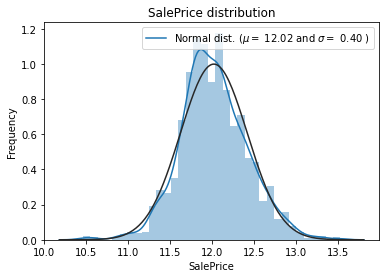

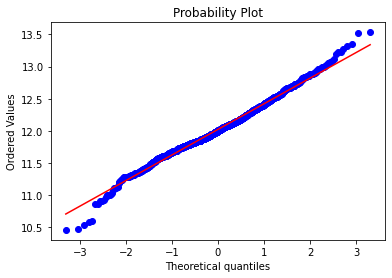

In [ ]:
y_train["SalePrice"] = np.log1p(y_train["SalePrice"])

sns.distplot(y_train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(y_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(y_train['SalePrice'], plot=plt)
plt.show()

## **Check for percentage of missing values**

In [ ]:

ntrain = train.shape[0]
ntest = test.shape[0]
all_data = pd.concat([train, test], axis = 0, ignore_index= True)
all_ID = all_data['Id']
all_data.drop('Id', axis = 1, inplace = True)

In [ ]:

missingRatio = (all_data.isnull().sum()/len(all_data)*100).sort_values(ascending = False)
missingRatio.head(20)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
dtype: float64

# **2(a)**
## **Missing data (Null Value) Handle**

In [ ]:
cols = all_data[missingRatio[missingRatio >0].index]


 Replaces NaN values in the following columns with "None" value

In [ ]:
for col in cols:
    if col in ('Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'MiscFeature', 'PoolQC'):
        all_data[col] = all_data[col].fillna("None")

Replaces null values with median value

In [ ]:
for col in cols:
   if col == 'LotFrontage':
        all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Replaces null values with 0 for the following columns

In [ ]:
for col in cols:
    if col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'):
        all_data[col] = all_data[col].fillna(0)

Fill in missing values with most commom value for each column

In [ ]:
for col in cols:
    if col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'MSSubClass'):
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

Completely removing from train and test dataset

In [ ]:
for col in cols:
    if col == 'Utilities':
        all_data = all_data.drop(['Utilities'], axis=1)

Data description says NA means typical

In [ ]:
for col in cols:
    if col == 'Functional':
        all_data["Functional"] = all_data["Functional"].fillna("Typ")

Filling missing values with 0 according to data description

In [ ]:
for col in cols:
  if col in ('Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'MiscFeature', 'PoolQC', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'MSSubClass', 'Utilities', 'Functional'):
    pass
  else:
        all_data[col].fillna(0, inplace=True)

In [ ]:
missingRatio = (all_data.isnull().sum()/len(all_data)*100).sort_values(ascending = False)
missingRatio[missingRatio != 0]

Series([], dtype: float64)

# **2(b)**
## **Categorical data handle:**
Applying label encoding to convert categorical values to numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

      
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 78)


Convert numerical values to categorical. Some attributes are truly categorical in nature. Hence it is important to convert them to categorical.

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Adding a new feature to our train and test dataset

In [ ]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [ ]:
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2919, 79)


## **Encoding all categorical Features**

In [ ]:
all_data = pd.get_dummies(all_data)
all_data.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,...,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_0,MoSold_1,MoSold_10,MoSold_11,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_0,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,1,3,0,7,2003,2003,196.0,2,4,2,4,3,2,706.0,6,0.0,150.0,856.0,0,1,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,2003.0,2,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,1,1,3,0,6,1976,1976,0.0,3,4,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,1976.0,2,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,1,1,0,0,7,2001,2002,162.0,2,4,2,4,2,2,486.0,6,0.0,434.0,920.0,0,1,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,2001.0,2,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,1,1,0,0,7,1915,1970,0.0,3,4,4,1,3,0,216.0,6,0.0,540.0,756.0,2,1,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,1998.0,3,...,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,1,1,0,0,8,2000,2000,350.0,2,4,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,1,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,2000.0,2,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]
print("Train:", train.shape)
print("Test:",test.shape)

Train: (1460, 259)
Test: (1459, 259)


In [ ]:
train = pd.concat([all_ID[:ntrain], all_data[:ntrain]], axis = 1)
test = pd.concat([all_ID[ntrain:], all_data[ntrain:]], axis = 1)
print("Train:", train.shape)
print("Test:",test.shape)

Train: (1460, 260)
Test: (1459, 260)


In [ ]:
assert(train.shape[0] == y_train.shape[0])
print('Train Data:', train.shape)
print('Test Data:', test.shape)

Train Data: (1460, 260)
Test Data: (1459, 260)


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train, y_train, test_size = 0.2)

In [ ]:
assert(x_train.shape[0] == y_train.shape[0])
assert(x_val.shape[0] == y_val.shape[0])
print('Train Data:', x_train.shape)
print('Validation Data:', x_val.shape)

Train Data: (1168, 260)
Validation Data: (292, 260)


In [ ]:
x_train.head()

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,...,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_0,MoSold_1,MoSold_10,MoSold_11,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_0,YrSold_1,YrSold_2,YrSold_3,YrSold_4,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
454,455,63.0,9297,1,1,3,0,5,1976,1976,0.0,3,4,4,4,3,0,1606.0,6,0.0,122.0,1728.0,4,1,1728,0,0,1728,2.0,0.0,2,0,4,2,3,8,6,0,3,1976.0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
855,856,72.0,6897,1,1,0,0,5,1962,2010,0.0,3,2,4,4,3,0,659.0,6,0.0,381.0,1040.0,0,1,1040,0,0,1040,1.0,0.0,1,1,3,1,3,6,6,0,3,1962.0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
157,158,92.0,12003,1,1,3,0,8,2009,2010,84.0,2,4,0,4,3,6,0.0,6,0.0,774.0,774.0,0,1,774,1194,0,1968,0.0,0.0,2,1,4,1,0,8,6,1,2,2009.0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1257,1258,56.0,4060,1,1,3,0,5,1922,1950,0.0,3,4,1,4,3,6,0.0,6,0.0,864.0,864.0,0,1,864,0,0,864,0.0,0.0,1,0,2,1,3,4,6,0,3,0.0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
753,754,80.0,10240,1,1,3,0,8,2005,2005,178.0,2,4,2,4,2,6,0.0,6,0.0,1030.0,1030.0,2,1,1038,1060,0,2098,0.0,0.0,2,1,3,1,0,8,6,1,2,2005.0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# **2(d)**
## **Scaling Features:**

Scaling the features using RobustScaler


In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(x_train.drop('Id', axis = 1))

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [ ]:
x_train.drop('Id', axis = 1, inplace = True)
x_val.drop('Id', axis = 1, inplace = True)
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train = rs.transform(x_train)
x_val = rs.transform(x_val)
test = rs.transform(test)

**Evaluation:** RMSE

In [ ]:
def log_rmse(y_actual, y_pred):
    return np.sqrt(mean_squared_error(y_actual, y_pred))

# **1(a)**
## **Linear Regression:**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train['SalePrice'])


print('The train Log RMSE is {:.4f}'.format(log_rmse(lr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(lr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0919
The validation Log RMSE is 0.1640


## **Linear Regression with L2 Regularization:**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
lr_ridge = Ridge(alpha= 0.1)
lr_ridge.fit(x_train, y_train['SalePrice'])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('The train Log RMSE is {:.4f}'.format(log_rmse(lr_ridge.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(lr_ridge.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0926
The validation Log RMSE is 0.1546


## **Linear Regression with L1 Regularization:**

In [ ]:
from sklearn.linear_model import Lasso
lr_lasso = Lasso()

In [ ]:
lr_lasso.fit(x_train, y_train['SalePrice'])

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print('The train Log RMSE is {:.4f}'.format(log_rmse(lr_lasso.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(lr_lasso.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.3848
The validation Log RMSE is 0.3742


# **1(c)**
## **Random Forest Regressor:**
Estimator count = 100

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
rf.fit(x_train, y_train['SalePrice'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print('The train Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0548
The validation Log RMSE is 0.1408


Estimator count = 50

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train, y_train['SalePrice'])
print('The train Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0583
The validation Log RMSE is 0.1401


Estimator count = 10. Performance decresasing

In [ ]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train, y_train['SalePrice'])
print('The train Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0656
The validation Log RMSE is 0.1454


Estimator count = 5, Performance decreasing

In [ ]:
rf = RandomForestRegressor(n_estimators=5)
rf.fit(x_train, y_train['SalePrice'])
print('The train Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(rf.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0834
The validation Log RMSE is 0.1537


# **1(d)**
## **Gradient Boosting Algorithm:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 1000)
gbr.fit(x_train, y_train['SalePrice'])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('The train Log RMSE is {:.4f}'.format(log_rmse(gbr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(gbr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0158
The validation Log RMSE is 0.1301


# **1.(b)**
## **Decesion Tree Regressor With Depth Restriction:**
max_depth = 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(x_train, y_train['SalePrice'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.2277
The validation Log RMSE is 0.2306


max_depth = 5

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(x_train, y_train['SalePrice'])

print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.1515
The validation Log RMSE is 0.1831


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(x_train, y_train['SalePrice'])

print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.1515
The validation Log RMSE is 0.1831


max_depth = 7

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(ccp_alpha=0.001, max_depth=7, random_state=42)
dtr.fit(x_train, y_train['SalePrice'])

print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.1843
The validation Log RMSE is 0.1904


## **Decision Tree Regressor With No Depth Restriction**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=None)
dtr.fit(x_train, y_train['SalePrice'])

print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr.predict(x_val), y_val['SalePrice'])))

The train Log RMSE is 0.0000
The validation Log RMSE is 0.2184


# **3.**
## **Principle component analysis:**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x_train.shape

(1168, 259)

In [ ]:
pca = PCA(n_components = 2)
x_reduced_train = pca.fit_transform(x_train)

In [ ]:
x_reduced_train.shape

(1168, 2)

In [ ]:
x_reduced_val = pca.fit_transform(x_val)

In [ ]:
x_reduced_val.shape

(292, 2)

## **Linear Regression After PCA**

In [ ]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()

In [ ]:
lr2.fit(x_reduced_train, y_train['SalePrice'])


print('The train Log RMSE is {:.4f}'.format(log_rmse(lr2.predict(x_reduced_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(lr2.predict(x_reduced_val), y_val['SalePrice'])))

The train Log RMSE is 0.4012
The validation Log RMSE is 0.3921


## **Decession Tree Regressior After PCA with No Maximum Depth Restriction**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr2 = DecisionTreeRegressor(max_depth=None)
dtr2.fit(x_reduced_train, y_train['SalePrice'])


print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr2.predict(x_reduced_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr2.predict(x_reduced_val), y_val['SalePrice'])))


The train Log RMSE is 0.0045
The validation Log RMSE is 0.6247


**Performance is good at max_depth = 5 though it doesn't improve the result compared to regularization task in step 1(a)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr2 = DecisionTreeRegressor(max_depth=5)
dtr2.fit(x_reduced_train, y_train['SalePrice'])


print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr2.predict(x_reduced_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr2.predict(x_reduced_val), y_val['SalePrice'])))


The train Log RMSE is 0.2599
The validation Log RMSE is 0.3998


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr2 = DecisionTreeRegressor(max_depth=10)
dtr2.fit(x_reduced_train, y_train['SalePrice'])


print('The train Log RMSE is {:.4f}'.format(log_rmse(dtr2.predict(x_reduced_train), y_train['SalePrice'])))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(dtr2.predict(x_reduced_val), y_val['SalePrice'])))


The train Log RMSE is 0.1618
The validation Log RMSE is 0.6283


# **4.**
**Eensemble learning:** Often machine learning problems are complex and available algorithms and models are insufficient in terms of getting the most out of those complex data. Though we have different models for different type of problems, it's often not sufficient to only use that individual models prediction. In that case if we aggregate multiple models such as regressor or classifiers, and use their average output prediction as our final output, then it happens that we become very much benefitted. These aggregate models are called ensemble and this technique is called ensemble learning. 

**Bagging**: Bagging is an ensemble learning approach. In standard ensemble learing different predictors aare used to get the final output. What bagging does is that splits the training set randomly with replacement and feed those subsets of data the different predictors. As a result a fruitful prediction comes out as final output. 

**Boosting**: Boosting is a way to strengthen weak learning models. In terms of ensemble learning a simple model is fitted on data and sequentially there more models that learn from this models errors , also called residual errors. If prior model fails to predict correctly, next model in the step increases the weight parameter. Thus boosting performance of models.

**Differences**:
1. Bagging reduces over-fitting of the model whereas boosting is prone to over-fitting.
2. Bagging goal is to reduce the variance of the classifiers whereas boosting aims to increase accuracy.
3. Bagging use weighted average to combine single model whereas boosting utilizes weighted majority vote to combine single model.
4. Bagging randomly partitions training samples whereas boosting prioritizes misclassified samples. 
5. Bagging example random forest; boosting example ada boost 